In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

#tf.debugging.set_log_device_placement(True)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime

tf.get_logger().setLevel('WARNING')
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
matplotlib.rcParams['figure.figsize'] = (16, 12)
matplotlib.rcParams['axes.grid'] = False

train_size = 300000 

In [3]:
zip_data = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_data)

In [4]:
df = pd.read_csv(csv_path)
display(df.head())

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [7]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d91351080>,
      dtype=object)

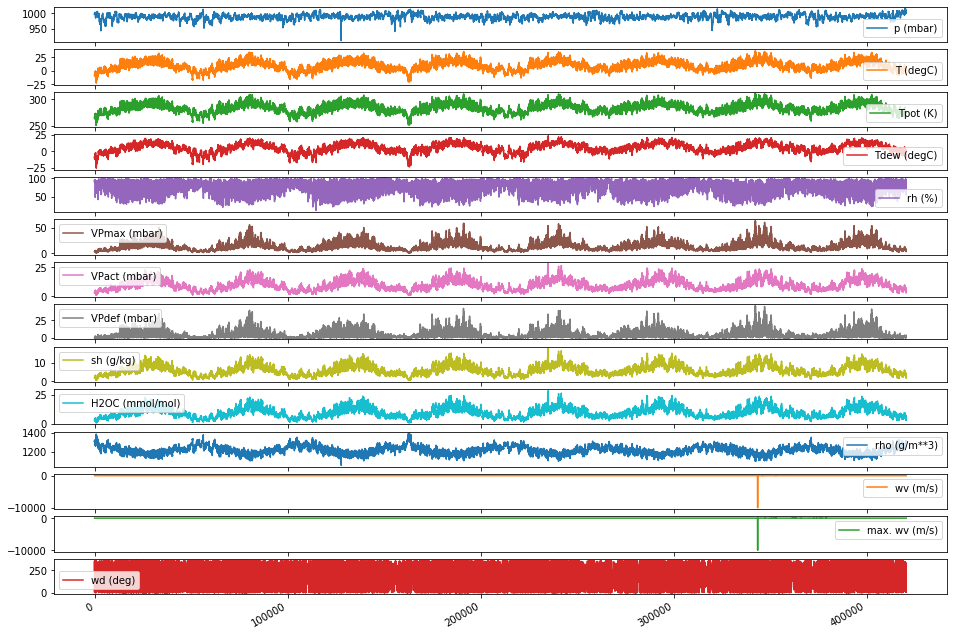

In [8]:
df.plot(subplots=True)

In [9]:
df_values = df.set_index("Date Time")
display(df_values.head())
df_values = df_values.values
print("df_values created")

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


df_values created


In [10]:
data_mean = df_values[:train_size].mean(axis=0)
print("df_mean created")
data_std = df_values[:train_size].std(axis=0)
print("df_std created")

normalized_df = (df_values - data_mean)/data_std

df_mean created
df_std created


In [11]:
def prepare_data(train_dataset, target_dataset, start_index, end_index, trainig_window_size,
                      predict_window_size, prediction_steps, single_step=False):
  """
    Parameters:

      train_dataset - data to be splited
      target_dataset -  what we want to predict
      start_index - from what index to split
      end_index - till what indext split

      trainig_window_size - training size window
      predict_window_size - prediction size window
      prediction_steps - how many steps should we predict
      single_step - should we predict only single steps 
    
    Returns:
      train_dataset, test_dataset
  """

  data = []
  labels = []

  print("train_dataset shape ", train_dataset.shape)
  print("target_dataset shape ", target_dataset.shape)

  # setting start index for next from first input data index
  # if end_index is not given thern end index is last valid one
  # in train_single case 
  #         start_index = 720
  #         end index = 300000
  start_index = start_index + trainig_window_size   # start_index for prediction
  if end_index is None:
    end_index = len(train_dataset) - predict_window_size   # end_index is max available if not passed as arg

  # iteration for start/end with prediction_steps 1 ( sliding window )
  # for i in range(720, 300000, 1):
  for i in range(start_index, end_index):
    indices = range(i-trainig_window_size, i, prediction_steps)
    # input_data indicaes are from range(720 - 720, 720, 6)
    data.append(train_dataset[indices])

    if single_step:
      labels.append(target_dataset[i+predict_window_size])
    else:
      labels.append(target_dataset[i:i+predict_window_size])

  print("data shape {}\nlabels shape {}" .format(np.array(data).shape, np.array(labels).shape))
  return np.array(data), np.array(labels)

def create_time_steps(length):
  return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/prediction_steps, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/prediction_steps, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [12]:
past_history = 720
future_target = 72
prediction_steps = 6

print("TRAINING DATASET")
x_train, y_train = prepare_data(train_dataset=df_values, 
                                target_dataset=df_values[:, 1],    # predicting temperature
                                start_index=0,                     # 0
                                end_index=train_size,              # 300000
                                trainig_window_size=past_history,  # 720
                                predict_window_size=future_target, # 72
                                prediction_steps=prediction_steps, # 6
                                single_step=False)
print("VALIDATION DATASET")
x_val, y_val = prepare_data(train_dataset=df_values,           # all data
                            target_dataset=df_values[:, 1],    # predicting temperature
                            start_index = train_size,          # 300000
                            end_index=None,                    # None ( we`re going till the end )
                            trainig_window_size=past_history, # 720
                            predict_window_size=future_target, # 72
                            prediction_steps=prediction_steps, # 6
                            single_step=False)                  

TRAINING DATASET
train_dataset shape  (420551, 14)
target_dataset shape  (420551,)
data shape (299280, 120, 14)
labels shape (299280, 72)
VALIDATION DATASET
train_dataset shape  (420551, 14)
target_dataset shape  (420551,)
data shape (119759, 120, 14)
labels shape (119759, 72)


In [13]:
strategy = tf.distribute.MirroredStrategy()
print("mirrored_strategy.num_replicas_in_sync ", strategy.num_replicas_in_sync)

mirrored_strategy.num_replicas_in_sync  4


In [14]:
EPOCHS = 500
BATCH_SIZE = 128*strategy.num_replicas_in_sync
BUFFER_SIZE = 10000

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [16]:
#!rm -rf logs/fit

In [17]:
checkpoint_path = "training_1_clip/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("logdir = ", log_dir)

# Create a callback that saves the model's weights

with strategy.scope():
    
    def create_model():
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Conv1D(filters=150,
                                        kernel_size=11,
                                        strides=3,
                                        padding='same',
                                        input_shape=x_train.shape[-2:]))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.LSTM(128,
                                       dropout=0.2,
                                       return_sequences=True))
        model.add(tf.keras.layers.LSTM(32, 
                                       dropout=0.2, 
                                       activation='relu'))
        model.add(tf.keras.layers.Dense(150))
        model.add(tf.keras.layers.Dense(72))
        return model

    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_best_only=True,
                                                     save_weights_only=True,
                                                     verbose=1)

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    reduce_callback = tf.keras.callbacks.ReduceLROnPlateau(verbose=1)

    csv_logger = tf.keras.callbacks.CSVLogger('logs/training.log')

    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae')
    model.summary()
    multi_step_history = model.fit(train_dataset, epochs=EPOCHS,
                                          validation_data=val_dataset,
                                          callbacks=[cp_callback, tensorboard_callback, csv_logger, reduce_callback])

logdir =  logs/fit/20200205-235446
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 150)           23250     
_________________________________________________________________
dropout (Dropout)            (None, 40, 150)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 40, 128)           142848    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 150)               4950      
_________________________________________________________________
dense_1 (Dense)              (None, 72)                10872     
Total params: 202,528
Trainable params: 202,528
Non-trainable params: 0
_______________

Epoch 29/500
583/584 [============================>.] - ETA: 0s - loss: 1.8042
Epoch 00029: val_loss did not improve from 1.79192
584/584 [==============================] - 41s 69ms/step - loss: 1.8041 - val_loss: 1.8406
Epoch 30/500
583/584 [============================>.] - ETA: 0s - loss: 1.8143
Epoch 00030: val_loss did not improve from 1.79192
584/584 [==============================] - 41s 70ms/step - loss: 1.8141 - val_loss: 1.8441
Epoch 31/500
583/584 [============================>.] - ETA: 0s - loss: 1.7811
Epoch 00031: val_loss did not improve from 1.79192
584/584 [==============================] - 41s 69ms/step - loss: 1.7811 - val_loss: 1.7970
Epoch 32/500
583/584 [============================>.] - ETA: 0s - loss: 1.7767
Epoch 00032: val_loss did not improve from 1.79192
584/584 [==============================] - 40s 69ms/step - loss: 1.7767 - val_loss: 1.8448
Epoch 33/500
583/584 [============================>.] - ETA: 0s - loss: 1.7787
Epoch 00033: val_loss did not improve

Epoch 65/500
583/584 [============================>.] - ETA: 0s - loss: 1.6013
Epoch 00065: val_loss did not improve from 1.69606
584/584 [==============================] - 40s 69ms/step - loss: 1.6012 - val_loss: 1.7044
Epoch 66/500
583/584 [============================>.] - ETA: 0s - loss: 1.6004
Epoch 00066: val_loss did not improve from 1.69606
584/584 [==============================] - 40s 68ms/step - loss: 1.6003 - val_loss: 1.6996
Epoch 67/500
583/584 [============================>.] - ETA: 0s - loss: 1.5955
Epoch 00067: val_loss did not improve from 1.69606

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
584/584 [==============================] - 40s 69ms/step - loss: 1.5955 - val_loss: 1.6971
Epoch 68/500
583/584 [============================>.] - ETA: 0s - loss: 1.6015
Epoch 00068: val_loss improved from 1.69606 to 1.69202, saving model to training_1_clip/cp.ckpt
584/584 [==============================] - 40s 69ms/step - loss: 1.6015 - val_lo

Epoch 100/500
583/584 [============================>.] - ETA: 0s - loss: 1.5817
Epoch 00100: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5817 - val_loss: 1.6935
Epoch 101/500
583/584 [============================>.] - ETA: 0s - loss: 1.5818
Epoch 00101: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5819 - val_loss: 1.6936
Epoch 102/500
583/584 [============================>.] - ETA: 0s - loss: 1.5812
Epoch 00102: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5813 - val_loss: 1.6936
Epoch 103/500
583/584 [============================>.] - ETA: 0s - loss: 1.5808
Epoch 00103: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5807 - val_loss: 1.6936
Epoch 104/500
583/584 [============================>.] - ETA: 0s - loss: 1.5827
Epoch 00104: val_loss did not im

Epoch 136/500
583/584 [============================>.] - ETA: 0s - loss: 1.5838
Epoch 00136: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5838 - val_loss: 1.6938
Epoch 137/500
583/584 [============================>.] - ETA: 0s - loss: 1.5826
Epoch 00137: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5827 - val_loss: 1.6938
Epoch 138/500
583/584 [============================>.] - ETA: 0s - loss: 1.5802
Epoch 00138: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5802 - val_loss: 1.6938
Epoch 139/500
583/584 [============================>.] - ETA: 0s - loss: 1.5832
Epoch 00139: val_loss did not improve from 1.68844

Epoch 00139: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.
584/584 [==============================] - 41s 70ms/step - loss: 1.5832 - val_loss: 1.6938
Epoch 140/500
583/584 [========

Epoch 172/500
583/584 [============================>.] - ETA: 0s - loss: 1.5818
Epoch 00172: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5819 - val_loss: 1.6938
Epoch 173/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00173: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5814 - val_loss: 1.6938
Epoch 174/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00174: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5813 - val_loss: 1.6938
Epoch 175/500
583/584 [============================>.] - ETA: 0s - loss: 1.5811
Epoch 00175: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5809 - val_loss: 1.6938
Epoch 176/500
583/584 [============================>.] - ETA: 0s - loss: 1.5790
Epoch 00176: val_loss did not im

Epoch 208/500
583/584 [============================>.] - ETA: 0s - loss: 1.5805
Epoch 00208: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5805 - val_loss: 1.6938
Epoch 209/500
583/584 [============================>.] - ETA: 0s - loss: 1.5831
Epoch 00209: val_loss did not improve from 1.68844

Epoch 00209: ReduceLROnPlateau reducing learning rate to 1.0000000664932204e-18.
584/584 [==============================] - 40s 68ms/step - loss: 1.5831 - val_loss: 1.6938
Epoch 210/500
583/584 [============================>.] - ETA: 0s - loss: 1.5828
Epoch 00210: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5826 - val_loss: 1.6938
Epoch 211/500
583/584 [============================>.] - ETA: 0s - loss: 1.5811
Epoch 00211: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5812 - val_loss: 1.6938
Epoch 212/500
583/584 [=======

Epoch 244/500
583/584 [============================>.] - ETA: 0s - loss: 1.5827
Epoch 00244: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5827 - val_loss: 1.6938
Epoch 245/500
583/584 [============================>.] - ETA: 0s - loss: 1.5824
Epoch 00245: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5823 - val_loss: 1.6938
Epoch 246/500
583/584 [============================>.] - ETA: 0s - loss: 1.5817
Epoch 00246: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5817 - val_loss: 1.6938
Epoch 247/500
583/584 [============================>.] - ETA: 0s - loss: 1.5829
Epoch 00247: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5829 - val_loss: 1.6938
Epoch 248/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00248: val_loss did not im

Epoch 280/500
583/584 [============================>.] - ETA: 0s - loss: 1.5804
Epoch 00280: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5804 - val_loss: 1.6938
Epoch 281/500
583/584 [============================>.] - ETA: 0s - loss: 1.5824
Epoch 00281: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5824 - val_loss: 1.6938
Epoch 282/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00282: val_loss did not improve from 1.68844
584/584 [==============================] - 41s 69ms/step - loss: 1.5815 - val_loss: 1.6938
Epoch 283/500
583/584 [============================>.] - ETA: 0s - loss: 1.5811
Epoch 00283: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5811 - val_loss: 1.6938
Epoch 284/500
583/584 [============================>.] - ETA: 0s - loss: 1.5817
Epoch 00284: val_loss did not im

Epoch 316/500
583/584 [============================>.] - ETA: 0s - loss: 1.5803
Epoch 00316: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5804 - val_loss: 1.6938
Epoch 317/500
583/584 [============================>.] - ETA: 0s - loss: 1.5803
Epoch 00317: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5803 - val_loss: 1.6938
Epoch 318/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00318: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5816 - val_loss: 1.6938
Epoch 319/500
583/584 [============================>.] - ETA: 0s - loss: 1.5804
Epoch 00319: val_loss did not improve from 1.68844

Epoch 00319: ReduceLROnPlateau reducing learning rate to 1.0000001235416985e-29.
584/584 [==============================] - 40s 68ms/step - loss: 1.5804 - val_loss: 1.6938
Epoch 320/500
583/584 [=======

Epoch 352/500
583/584 [============================>.] - ETA: 0s - loss: 1.5817
Epoch 00352: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5817 - val_loss: 1.6938
Epoch 353/500
583/584 [============================>.] - ETA: 0s - loss: 1.5813
Epoch 00353: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5812 - val_loss: 1.6938
Epoch 354/500
583/584 [============================>.] - ETA: 0s - loss: 1.5810
Epoch 00354: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5810 - val_loss: 1.6938
Epoch 355/500
583/584 [============================>.] - ETA: 0s - loss: 1.5822
Epoch 00355: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5822 - val_loss: 1.6938
Epoch 356/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00356: val_loss did not im

Epoch 388/500
583/584 [============================>.] - ETA: 0s - loss: 1.5816
Epoch 00388: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5817 - val_loss: 1.6938
Epoch 389/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00389: val_loss did not improve from 1.68844

Epoch 00389: ReduceLROnPlateau reducing learning rate to 1.0000001614954723e-36.
584/584 [==============================] - 40s 69ms/step - loss: 1.5815 - val_loss: 1.6938
Epoch 390/500
583/584 [============================>.] - ETA: 0s - loss: 1.5822
Epoch 00390: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5822 - val_loss: 1.6938
Epoch 391/500
583/584 [============================>.] - ETA: 0s - loss: 1.5818
Epoch 00391: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5817 - val_loss: 1.6938
Epoch 392/500
583/584 [=======

Epoch 424/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00424: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5814 - val_loss: 1.6938
Epoch 425/500
583/584 [============================>.] - ETA: 0s - loss: 1.5796
Epoch 00425: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5795 - val_loss: 1.6938
Epoch 426/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00426: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5815 - val_loss: 1.6938
Epoch 427/500
583/584 [============================>.] - ETA: 0s - loss: 1.5823
Epoch 00427: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5823 - val_loss: 1.6938
Epoch 428/500
583/584 [============================>.] - ETA: 0s - loss: 1.5808
Epoch 00428: val_loss did not im

Epoch 460/500
583/584 [============================>.] - ETA: 0s - loss: 1.5823
Epoch 00460: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5821 - val_loss: 1.6938
Epoch 461/500
583/584 [============================>.] - ETA: 0s - loss: 1.5813
Epoch 00461: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5812 - val_loss: 1.6938
Epoch 462/500
583/584 [============================>.] - ETA: 0s - loss: 1.5808
Epoch 00462: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5808 - val_loss: 1.6938
Epoch 463/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00463: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5815 - val_loss: 1.6938
Epoch 464/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00464: val_loss did not im

Epoch 496/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00496: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5814 - val_loss: 1.6938
Epoch 497/500
583/584 [============================>.] - ETA: 0s - loss: 1.5815
Epoch 00497: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5815 - val_loss: 1.6938
Epoch 498/500
583/584 [============================>.] - ETA: 0s - loss: 1.5816
Epoch 00498: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 68ms/step - loss: 1.5816 - val_loss: 1.6938
Epoch 499/500
583/584 [============================>.] - ETA: 0s - loss: 1.5814
Epoch 00499: val_loss did not improve from 1.68844
584/584 [==============================] - 40s 69ms/step - loss: 1.5813 - val_loss: 1.6938
Epoch 500/500
583/584 [============================>.] - ETA: 0s - loss: 1.5812
Epoch 00500: val_loss did not im

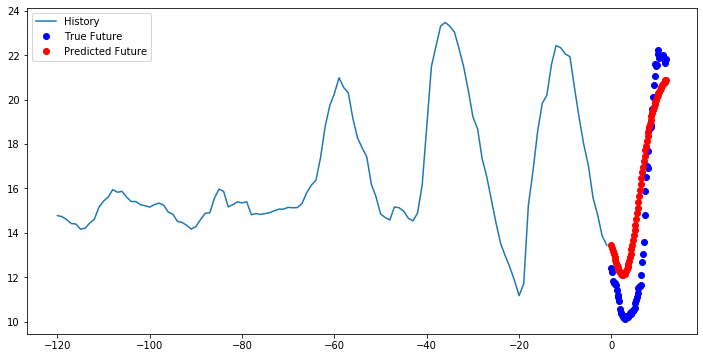

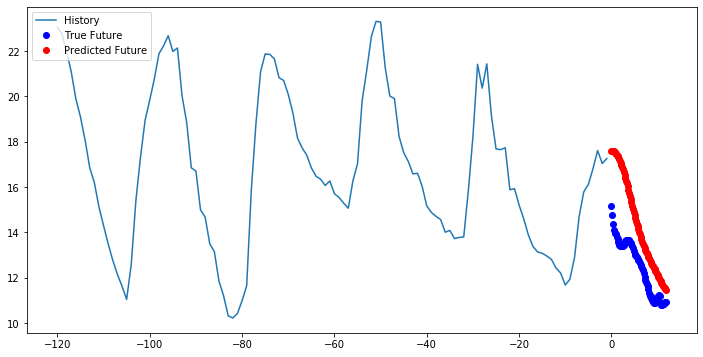

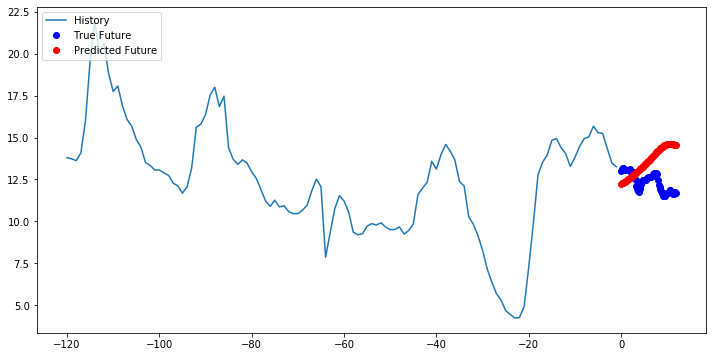

In [18]:
for x, y in val_dataset.take(3):
  multi_step_plot(x[0], y[0], model.predict(x)[0])